## 1\. Pinguins

* Vamos utilizar uma base de dados com informações sobre penguins. A idéia é preparar a base de dados para prever a espécie do penguin (variável resposta) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = sns.load_dataset('penguins')

In [3]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Valores nulos**

* Tratar a base de dados possui valores faltantes

In [4]:
# Preenche os valores faltantes com a média de cada coluna
data = data.fillna(data.mean())

<ipython-input-4-f70044fd3293>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [5]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


### **1.2. Variáveis numéricas**

In [6]:
# Cria uma instância da classe StandardScaler
scaler = StandardScaler()

# Identifica as colunas numéricas
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Cria as novas colunas padronizadas
for col in numeric_cols:
  data[col + '_std'] = scaler.fit_transform(data[[col]])

# Mostra as primeiras cinco linhas da base de dados com as novas colunas
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,-8.870812e-01,7.877425e-01,-1.422488,-0.565789
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,-8.134940e-01,1.265563e-01,-1.065352,-0.503168
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,-6.663195e-01,4.317192e-01,-0.422507,-1.192003
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,-1.307172e-15,1.806927e-15,0.000000,0.000000
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,-1.328605e+00,1.092905e+00,-0.565361,-0.941517


### **1.3. Variáveis categóricas**

In [7]:
# Identifica as colunas categóricas nominais
nominal_cols = ['island', 'sex']

* Cria as novas colunas para as variáveis nominais usando get_dummies
* Essa função cria uma coluna para cada valor único da variável nominal, com 1 se o valor está presente e 0 se não está

In [8]:
# O parâmetro prefix adiciona o nome da coluna original ao início do nome da nova coluna
data = pd.concat([data, pd.get_dummies(data[nominal_cols], prefix=nominal_cols)], axis=1)

In [9]:
# Identifica as colunas categóricas ordinais
ordinal_cols = ['species']

* Cria as novas colunas para as variáveis ordinais usando factorize ou map
* Essas funções atribuem um valor numérico inteiro para cada valor único da variável ordinal, de acordo com a ordem especificada
* O parâmetro sort=True ordena os valores alfabeticamente antes de atribuir os números

In [10]:
# Você também pode usar um dicionário para mapear os valores para os números desejados
for col in ordinal_cols:
  data[col + '_ord'] = data[col].factorize(sort=True)[0]
  data[col + '_ord'] = data[col].map({'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3})

In [11]:
# Mostra as primeiras cinco linhas da base de dados com as novas colunas
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male,species_ord
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,0,0,1,0,1,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,0,0,1,1,0,1
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,0,0,1,1,0,1
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,-1.307172e-15,1.806927e-15,0.000000,0.000000,0,0,1,0,0,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,0,0,1,1,0,1


### **1.4. Limpeza**

In [ ]:
# Descarta as colunas originais
data = data.drop(numeric_cols + nominal_cols + ordinal_cols, axis=1)

# Mostra as primeiras cinco linhas da base de dados com as novas colunas
data.head()

,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,body_mass_g_std,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male,species_ord,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,0,0,1,0,1,1,0,0,1,0,1
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,0,0,1,1,0,1,0,0,1,1,0
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,0,0,1,1,0,1,0,0,1,1,0
3,-1.307172e-15,1.806927e-15,0.000000,0.000000,0,0,1,0,0,1,0,0,1,0,0
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,0,0,1,1,0,1,0,0,1,1,0


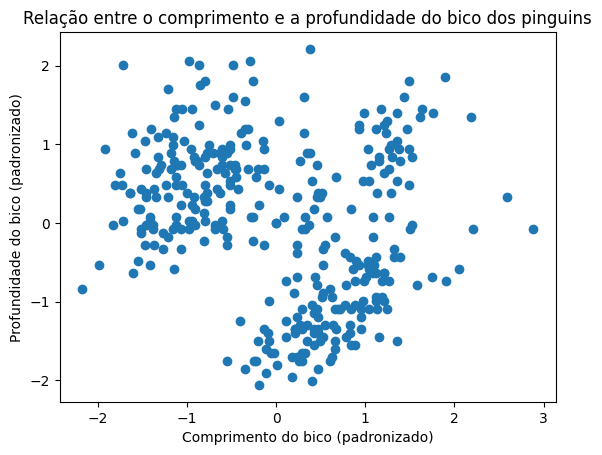

In [12]:
# Cria um gráfico de dispersão com as colunas padronizadas do comprimento e da profundidade do bico
plt.scatter(data['bill_length_mm_std'], data['bill_depth_mm_std'])

# Adiciona um título ao gráfico
plt.title('Relação entre o comprimento e a profundidade do bico dos pinguins')

# Adiciona rótulos aos eixos
plt.xlabel('Comprimento do bico (padronizado)')
plt.ylabel('Profundidade do bico (padronizado)')

# Mostra o gráfico
plt.show()

##**INSIGHTS**

* Esse gráfico mostra que há uma correlação negativa entre o comprimento e a profundidade do bico dos pinguins, ou seja, quanto maior o comprimento, menor a profundidade, e vice-versa. Isso pode indicar que os pinguins têm diferentes adaptações ao seu ambiente e à sua dieta.